In [98]:
import pandas as pd 
import os
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import KFold
from surprise import SVD
from surprise import accuracy
from surprise import NMF
from surprise import KNNBasic
import seaborn as sns

In [99]:
restdata=pd.read_csv("restaurant_ratings.txt",delimiter="\t",names=["user","item","rating","timestamp"])
restdata

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [100]:
filelocation=os.path.expanduser('restaurant_ratings.txt')
r=Reader(line_format='user item rating timestamp', sep='\t')
data=Dataset.load_from_file(filelocation,reader=r)
kfolds=KFold(n_splits=3,random_state=0,shuffle=True)


traindataset=[]
testdataset=[]

In [101]:
for traindata, testdata in kfolds.split(data):
    traindataset.append(traindata)
    testdataset.append(testdata)
    


In [102]:
def scoreofmodel(traindata,testdata):
    
    score=[]
    
    print("SVD working")
    SVDalgo=SVD()
    SVDalgo.fit(traindata)
    predval=SVDalgo.test(testdata)
    
    
    RMSESVD=accuracy.rmse(predval,verbose=True)
    
    MAESVD=accuracy.mae(predval,verbose=True)
    
    
    print("with PMF")
    SVDalgo=SVD(biased=False)
    SVDalgo.fit(traindata)
    predval=SVDalgo.test(testdata)
    
    
    RMSEPMF=accuracy.rmse(predval,verbose=True)
    
    MAEPMF=accuracy.mae(predval,verbose=True)
    
    
    print("NON-Negative Matrix Fact")
    
    nnmf=NMF()
    nnmf.fit(traindata)
    predval=nnmf.test(testdata)
    
    RMNNMF=accuracy.rmse(predval,verbose=True)
    MANNMF=accuracy.mae(predval,verbose=True)
    
    print("User based Collaborative Filtering algorithm")
    
    KNN=KNNBasic(sim_options={'user_based':True})
    KNN.fit(traindata)
    predval=KNN.test(testdata)
    
    RMKNN=accuracy.rmse(predval,verbose=True)
    MAEKNN=accuracy.mae(predval,verbose=True)
    
    print("Item based Collaborative Filtering algorithm")
    
    KNN=KNNBasic(sim_options={'user_based':False})
    KNN.fit(traindata)
    predval=KNN.test(testdata)
    
    RMSEitem=accuracy.rmse(predval,verbose=True)
    MAEitem=accuracy.mae(predval,verbose=True)
    
    score=[RMSESVD,MAESVD,RMSEPMF,MAEPMF,RMNNMF,MANNMF,RMKNN,MAEKNN,RMSEitem,MAEitem]
    
    return score
    

### Q10

In [103]:
fold1score=scoreofmodel(traindataset[0],testdataset[0])

SVD working
RMSE: 0.9480
MAE:  0.7484
with PMF
RMSE: 0.9702
MAE:  0.7631
NON-Negative Matrix Fact
RMSE: 0.9799
MAE:  0.7695
User based Collaborative Filtering algorithm
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9941
MAE:  0.7841
Item based Collaborative Filtering algorithm
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9872
MAE:  0.7813


Text(0.5, 1.0, 'Algorith Comparison - Fold 1')

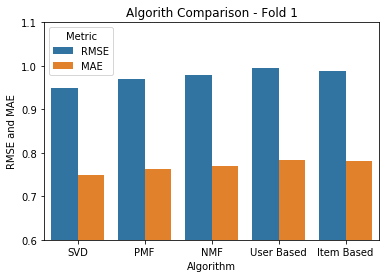

In [104]:
datalabel = {
    'Algorithm': ('SVD','SVD','PMF', 'PMF','NMF','NMF','User Based','User Based','Item Based','Item Based'), 
    'RMSE and MAE': fold1score,
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
}

dataf = pd.DataFrame(datalabel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=dataf,hue="Metric")
x.set_ylim([.6,1.1])
x.set_title("Algorith Comparison - Fold 1" ,loc="center")

from the above we can concluded that the <b>SVD has the lowest value</b> compared to all the other metrics

### Q11

In [105]:
fold2score=scoreofmodel(traindataset[1],testdataset[1])

SVD working
RMSE: 0.9396
MAE:  0.7428
with PMF
RMSE: 0.9582
MAE:  0.7559
NON-Negative Matrix Fact
RMSE: 0.9652
MAE:  0.7580
User based Collaborative Filtering algorithm
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9832
MAE:  0.7760
Item based Collaborative Filtering algorithm
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9787
MAE:  0.7754


Text(0.5, 1.0, 'Algorith Comparison - Fold 2')

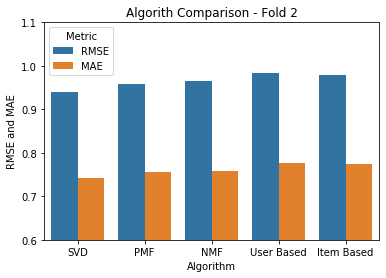

In [106]:
datalabel = {
    'Algorithm': ('SVD','SVD','PMF', 'PMF','NMF','NMF','User Based','User Based','Item Based','Item Based'), 
    'RMSE and MAE': fold2score,
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
}

dataf = pd.DataFrame(datalabel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=dataf,hue="Metric")
x.set_ylim([.6,1.1])
x.set_title("Algorith Comparison - Fold 2" ,loc="center")

from the above we can concluded that the <b>SVD has the lowest value</b> compared to all the other metrics

### Q12

In [107]:
fold3score=scoreofmodel(traindataset[2],testdataset[2])

SVD working
RMSE: 0.9506
MAE:  0.7500
with PMF
RMSE: 0.9751
MAE:  0.7693
NON-Negative Matrix Fact
RMSE: 0.9802
MAE:  0.7696
User based Collaborative Filtering algorithm
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9926
MAE:  0.7857
Item based Collaborative Filtering algorithm
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9937
MAE:  0.7863


Text(0.5, 1.0, 'Algorith Comparison - Fold 3')

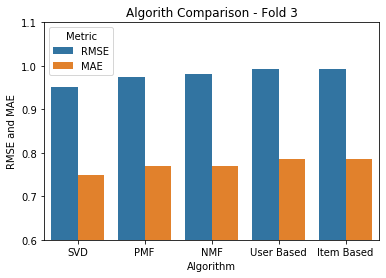

In [108]:
datalabel = {
    'Algorithm': ('SVD','SVD','PMF', 'PMF','NMF','NMF','User Based','User Based','Item Based','Item Based'), 
    'RMSE and MAE': fold3score,
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
}

dataf = pd.DataFrame(datalabel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=dataf,hue="Metric")
x.set_ylim([.6,1.1])
x.set_title("Algorith Comparison - Fold 3" ,loc="center")

from the above we can concluded that the <b>SVD has the lowest value</b> compared to all the other metrics

### Q13

In [109]:
def findavg(trainset, testset, method):
    
    size=len(trainset)
    sumofrmse=0
    sumofmse=0
    for i in range(size):
        method.fit(trainset[i])
        pred=method.test(testset[i])
        
        sumofrmse+=accuracy.rmse(pred,verbose=True)
        
        sumofmse+=accuracy.mae(pred,verbose=True)
        print()
    armse=sumofrmse/size
    amse=sumofmse/size
    print("Avg RMSE={}".format(armse))
    print("Avg MAE={}".format(amse))
    
    return armse,amse

In [110]:
print("******"*5,"SVD","******"*5)
print(" ")
svdrmse,svdmae=findavg(traindataset,testdataset,SVD())

****************************** SVD ******************************
 
RMSE: 0.9455
MAE:  0.7457

RMSE: 0.9364
MAE:  0.7385

RMSE: 0.9487
MAE:  0.7492

Avg RMSE=0.9435421289477605
Avg MAE=0.7444579625030309


In [111]:
print("******"*5,"PMF","******"*5)
print(" ")
pmfrmse,pmfmae=findavg(traindataset,testdataset,SVD(biased=False))

****************************** PMF ******************************
 
RMSE: 0.9659
MAE:  0.7616

RMSE: 0.9597
MAE:  0.7577

RMSE: 0.9732
MAE:  0.7664

Avg RMSE=0.9662503883732412
Avg MAE=0.7618923178382472


In [112]:
print("******"*5,"NMF","******"*5)
print(" ")
nmfrmse,nmfmae=findavg(traindataset,testdataset,NMF())

****************************** NMF ******************************
 
RMSE: 0.9744
MAE:  0.7642

RMSE: 0.9714
MAE:  0.7626

RMSE: 0.9855
MAE:  0.7771

Avg RMSE=0.9770940639227197
Avg MAE=0.7679872936396562


In [113]:
print("******"*5,"User Based Collaborative Filtering","******"*5)
print(" ")
userrmse,usermae=findavg(traindataset,testdataset,KNNBasic(sim_options={'user_based':True}))

****************************** User Based Collaborative Filtering ******************************
 
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9941
MAE:  0.7841

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9832
MAE:  0.7760

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9926
MAE:  0.7857

Avg RMSE=0.9899348891048744
Avg MAE=0.7819536859243135


In [114]:
print("******"*5,"item Based Collaborative Filtering","******"*5)
print(" ")
itemrmse,itemmae=findavg(traindataset,testdataset,KNNBasic(sim_options={'user_based':False}))

****************************** item Based Collaborative Filtering ******************************
 
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9872
MAE:  0.7813

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9787
MAE:  0.7754

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9937
MAE:  0.7863

Avg RMSE=0.9865282245806526
Avg MAE=0.7810296886142001


Text(0.5, 1.0, 'Algorith - Mean compare')

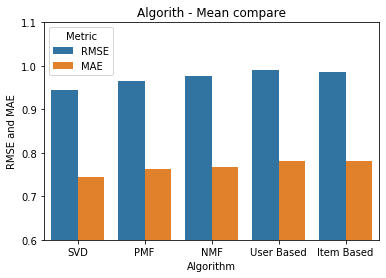

In [115]:
datalabel = {
    'Algorithm': ('SVD','SVD','PMF', 'PMF','NMF','NMF','User Based','User Based','Item Based','Item Based'), 
    'RMSE and MAE': [svdrmse,svdmae,pmfrmse,pmfmae,nmfrmse,nmfmae,userrmse,usermae,itemrmse,itemmae],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE','RMSE','MAE']
}

dataf = pd.DataFrame(datalabel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=dataf,hue="Metric")
x.set_ylim([.6,1.1])
x.set_title("Algorith - Mean compare" ,loc="center")

from the above we can concluded that the <b>SVD has the lowest value</b> compared to all the other metrics

### Q 14

#### user based

In [116]:
print("******"*3,"User Based Collaborative Filtering using MSD Similarity","******"*3)

print(" ")
msdrmse_user,msdmae_user=findavg(traindataset,testdataset,KNNBasic(sim_options={'user_based':True}))

****************** User Based Collaborative Filtering using MSD Similarity ******************
 
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9941
MAE:  0.7841

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9832
MAE:  0.7760

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9926
MAE:  0.7857

Avg RMSE=0.9899348891048744
Avg MAE=0.7819536859243135


In [117]:
print("******"*3,"User Based Collaborative Filtering using cosine Similarity","******"*3)
print(" ")
cosinermse_user,cosinmae_user=findavg(traindataset,testdataset,KNNBasic(sim_options={'name':'cosine','user_based':True}))

****************** User Based Collaborative Filtering using cosine Similarity ******************
 
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0260
MAE:  0.8112

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0163
MAE:  0.8031

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0253
MAE:  0.8137

Avg RMSE=1.0225442145861894
Avg MAE=0.8093346213727681


In [118]:
print("******"*3,"User Based Collaborative Filtering using pearson Similarity","******"*3)
print(" ")

perrmse_user,permae_user=findavg(traindataset,testdataset,KNNBasic(sim_options={'name':'pearson','user_based':True}))





****************** User Based Collaborative Filtering using pearson Similarity ******************
 
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0250
MAE:  0.8115

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0123
MAE:  0.8030

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0244
MAE:  0.8145

Avg RMSE=1.020562187258179
Avg MAE=0.8096649014365088


Text(0.5, 1.0, 'User based Collaborative filtering')

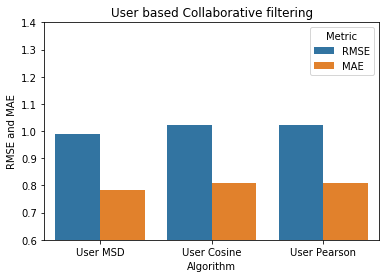

In [119]:
datalabel = {
    'Algorithm': ('User MSD','User MSD','User Cosine', 'User Cosine','User Pearson','User Pearson'), 
    'RMSE and MAE': [msdrmse_user,msdmae_user,cosinermse_user,cosinmae_user,perrmse_user,permae_user],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE']
}

dataf = pd.DataFrame(datalabel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=dataf,hue="Metric")
x.set_ylim([.6,1.4])
x.set_title("User based Collaborative filtering" ,loc="center")

#### item based

In [120]:

print("******"*3,"item Based Collaborative Filtering using MSD Similarity","******"*3)
print(" ")
msdrmse_item,msdmae_itme=findavg(traindataset,testdataset,KNNBasic(sim_options={'user_based':False}))

****************** item Based Collaborative Filtering using MSD Similarity ******************
 
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9872
MAE:  0.7813

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9787
MAE:  0.7754

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9937
MAE:  0.7863

Avg RMSE=0.9865282245806526
Avg MAE=0.7810296886142001


In [121]:
print("******"*3,"item Based Collaborative Filtering using Cosine based Similarity","******"*3)
print(" ")
cosinermse_item,cosinmae_item=findavg(traindataset,testdataset,KNNBasic(sim_options={'name':'cosine','user_based':False}))




****************** item Based Collaborative Filtering using Cosine based Similarity ******************
 
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0361
MAE:  0.8217

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0313
MAE:  0.8196

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0434
MAE:  0.8275

Avg RMSE=1.0369075296632437
Avg MAE=0.8229201955061879


In [122]:
print("******"*3,"Item Based Collaborative Filtering using Pearson Similarity","******"*3)
print(" ")
pearrmse_item,pearmae_item=findavg(traindataset,testdataset,KNNBasic(sim_options={'name':'pearson','user_based':False}))

****************** Item Based Collaborative Filtering using Pearson Similarity ******************
 
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0479
MAE:  0.8380

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0439
MAE:  0.8370

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0564
MAE:  0.8446

Avg RMSE=1.0494210834072175
Avg MAE=0.8398506491090796


Text(0.5, 1.0, 'Item based Collaborative filtering- similarity metrics')

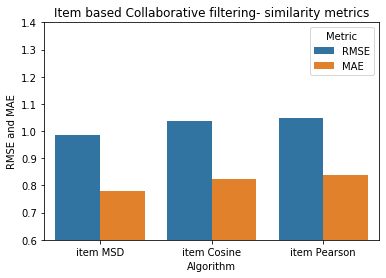

In [123]:
datalabel = {
    'Algorithm': ('item MSD','item MSD','item Cosine', 'item Cosine','item Pearson','item Pearson'), 
    'RMSE and MAE': [msdrmse_item,msdmae_itme,cosinermse_item,cosinmae_item,pearrmse_item,pearmae_item],
    'Metric':['RMSE','MAE','RMSE','MAE','RMSE','MAE']
}

dataf = pd.DataFrame(datalabel)
x = sns.barplot(x="Algorithm",y="RMSE and MAE",data=dataf,hue="Metric")
x.set_ylim([.6,1.4])
x.set_title("Item based Collaborative filtering- similarity metrics" ,loc="center")

MSD Similarity provides the lowest values of the RMSE and MAE for the user based and item based collaborative filtering

###  Q15

In [124]:
userrmse=[]
usermae=[]
maxval=30
for i in range(1,maxval):
    r,m=findavg(traindataset,testdataset,KNNBasic(k=i,sim_options={'user_based':True}))
    userrmse.append(r)
    usermae.append(m)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3322
MAE:  0.9842

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3302
MAE:  0.9839

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3184
MAE:  0.9713

Avg RMSE=1.3269412537591294
Avg MAE=0.9798001488386802
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1616
MAE:  0.8956

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1523
MAE:  0.8907

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1487
MAE:  0.8860

Avg RMSE=1.1541705638473736
Avg MAE=0.8907611474197997
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0972
MAE:  0.8570

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0881
MAE:  0.8496

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0881
MAE:

Done computing similarity matrix.
RMSE: 0.9923
MAE:  0.7820

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9815
MAE:  0.7738

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9901
MAE:  0.7825

Avg RMSE=0.9879868114496232
Avg MAE=0.7794337540039259
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9923
MAE:  0.7819

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9812
MAE:  0.7736

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9900
MAE:  0.7824

Avg RMSE=0.9878490521780753
Avg MAE=0.7792776695079905
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9922
MAE:  0.7820

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9814
MAE:  0.7739

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9901
MAE:  0.7825

Avg RMSE=0.9878985185398473
A

Text(0.5, 1.0, 'RMSE Values')

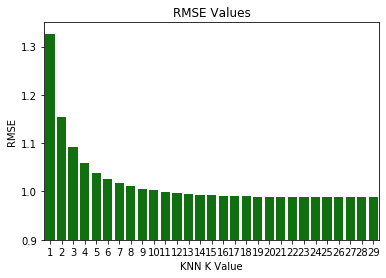

In [125]:
RMSE_KNN = {
    'KNN K Value': [y for y in range(1,maxval)], 
    'RMSE': userrmse
}
df=pd.DataFrame(RMSE_KNN)
graph = sns.barplot(x="KNN K Value",y="RMSE",data=df,color="Green")
graph.set_ylim([.9,1.35])
graph.set_title("RMSE Values")

Text(0.5, 1.0, 'MAE_Values')

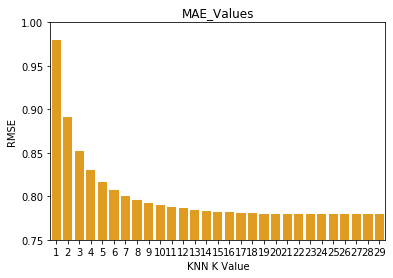

In [126]:
MAE_KNN = {
    'KNN K Value': [y for y in range(1,maxval)], 
    'RMSE': usermae
}
df=pd.DataFrame(MAE_KNN)
graph = sns.barplot(x="KNN K Value",y="RMSE",data=df,color="orange")
graph.set_ylim([.75,1.0])
graph.set_title("MAE_Values")

In [127]:
kbestval=userrmse.index(min(userrmse))+1
print("Best Value of K ={}".format(kbestval))
print("RMSE={}".format(min(userrmse)))

Best Value of K =25
RMSE=0.9878490521780753


 The best value of k for user based filter ing is 25

In [128]:
itemrmse=[]
itemmae=[]
maxval=30
for i in range(1,maxval):
    r,m=findavg(traindataset,testdataset,KNNBasic(k=i,sim_options={'user_based':False}))
    itemrmse.append(r)
    itemmae.append(m)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4270
MAE:  1.0501

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4271
MAE:  1.0549

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.4528
MAE:  1.0738

Avg RMSE=1.4356090647521549
Avg MAE=1.05959028765325
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2295
MAE:  0.9479

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2322
MAE:  0.9530

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2460
MAE:  0.9613

Avg RMSE=1.2359094403809512
Avg MAE=0.9540641838139597
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1521
MAE:  0.9005

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1504
MAE:  0.9021

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1650
MAE:  

Done computing similarity matrix.
RMSE: 0.9928
MAE:  0.7848

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9834
MAE:  0.7788

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9975
MAE:  0.7883

Avg RMSE=0.9912431753970466
Avg MAE=0.7839592203684851
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9918
MAE:  0.7839

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9827
MAE:  0.7782

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9970
MAE:  0.7880

Avg RMSE=0.9904783445829883
Avg MAE=0.7833292190574276
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9912
MAE:  0.7834

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9821
MAE:  0.7779

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9965
MAE:  0.7876

Avg RMSE=0.9898953293244223
A

Text(0.5, 1.0, 'RMSE Values')

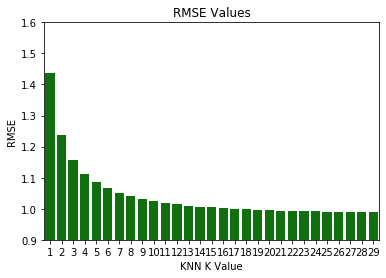

In [129]:
RMSE_KNN = {
    'KNN K Value': [y for y in range(1,maxval)], 
    'RMSE': itemrmse
}
dfdata=pd.DataFrame(RMSE_KNN)
graph = sns.barplot(x="KNN K Value",y="RMSE",data=dfdata,color="green")
graph.set_ylim([.9,1.6])
graph.set_title("RMSE Values")

Text(0.5, 1.0, 'RMSE Values')

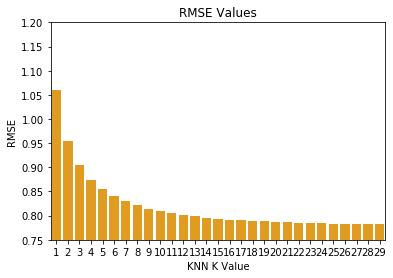

In [130]:
MAE_KNN = {
    'KNN K Value': [y for y in range(1,maxval)], 
    'RMSE': itemmae
}
dfdata=pd.DataFrame(MAE_KNN)
graph = sns.barplot(x="KNN K Value",y="RMSE",data=dfdata,color="orange")
graph.set_ylim([.75,1.2])
graph.set_title("RMSE Values")

In [131]:
kbestval=itemrmse.index(min(itemrmse))+1
print("Best Value of K = {}".format(kbestval))
print("RMSE= {}".format(min(itemrmse)))

Best Value of K = 29
RMSE= 0.988353481600738


The best value of K after the item based collaborativ filtering is 29

https://github.com/rpm360/MLassignment/blob/master/HW7/HW7.ipynb